<a href="https://colab.research.google.com/github/rachitt-t/AI-in-healthcare/blob/main/lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RACHIT TAYAL   E22CSEU0118

In [2]:
!pip install pandas numpy nltk wordcloud matplotlib seaborn vaderSentiment


In [6]:
import pandas as pd

df = pd.read_csv("/content/Adult_Immunization_Features_Headlines.csv")
print(df.columns)
df.head()


Index(['Date', 'Source', 'Headlines', 'Teaser'], dtype='object')


,Date,Source,Headlines,Teaser
0,October 2004,Medscape Infectious Diseases,"Infectious Diseases: October 30, 2004","Dr. Bartlett reviews the latest on influenza, ..."
1,July 2004,Journal of the American Board of Family Medicine,Influenza Vaccination in Pregnancy,Are enough family physicians and obstetricians...
2,June 2004,Medscape Nurses,Bacterial Meningitis: A Deadly But Preventable...,Those whose lives have been touched by this le...
3,April 2004,Alimentary Pharmacology & Therapeutics,Hepatitis Vaccination in Patients With Chronic...,Despite a declining incidence of acute viral h...
4,November 2003,Medscape Infectious Diseases,Emerging Infections,Dr. John Bartlett reports on the latest data f...


In [8]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Add this line to download the missing resource

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punct = string.punctuation

# Use the correct column name
text_column = 'Headlines'

def preprocess_text(text):
    text = str(text).lower()                               # lowercase
    text = "".join(ch for ch in text if ch not in punct)   # remove punctuation
    tokens = nltk.word_tokenize(text)                      # tokenize
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]  # lemmatize & remove stopwords
    return " ".join(tokens)

df['clean_text'] = df[text_column].apply(preprocess_text)

# Show few examples
df[[text_column, 'clean_text']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Headlines,clean_text
0,"Infectious Diseases: October 30, 2004",infectious disease october 30 2004
1,Influenza Vaccination in Pregnancy,influenza vaccination pregnancy
2,Bacterial Meningitis: A Deadly But Preventable...,bacterial meningitis deadly preventable disease
3,Hepatitis Vaccination in Patients With Chronic...,hepatitis vaccination patient chronic liver di...
4,Emerging Infections,emerging infection


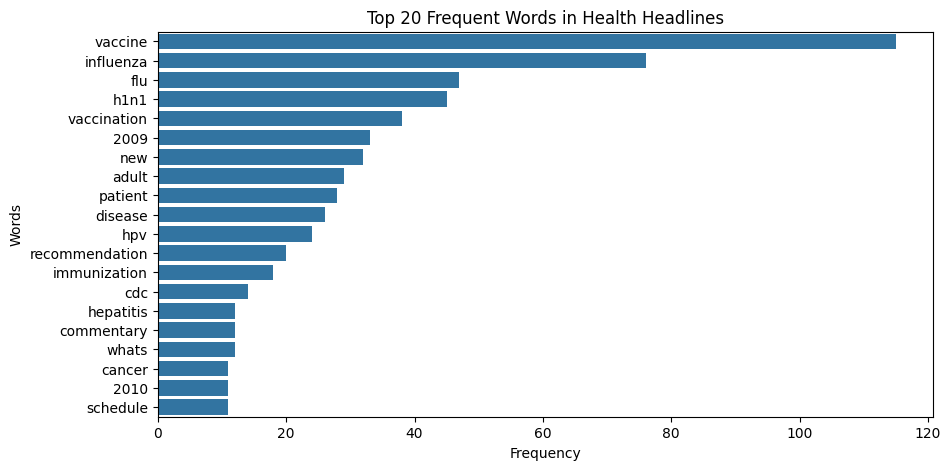

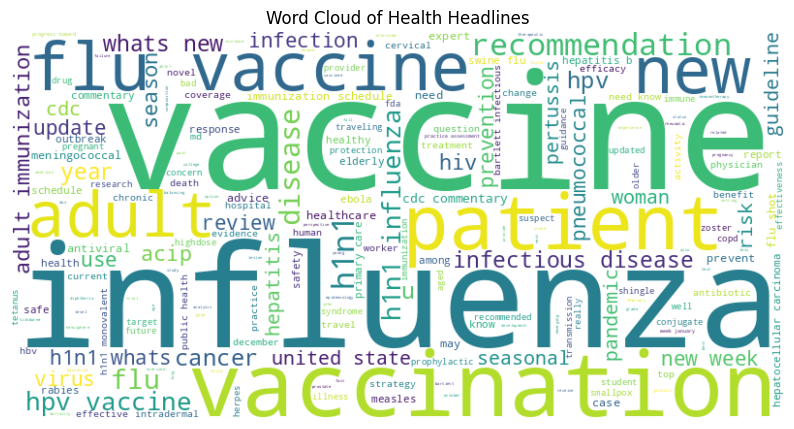

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Combine all cleaned words
all_words = " ".join(df['clean_text']).split()

# Count most frequent words
word_freq = Counter(all_words)
top_20 = word_freq.most_common(20)

# --- Bar plot of top 20 words ---
words, counts = zip(*top_20)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Frequent Words in Health Headlines")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# --- Word Cloud visualization ---
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Health Headlines")
plt.show()


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment category
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to all headlines
df['Sentiment'] = df['clean_text'].apply(get_sentiment)

# Display sample results
df[['clean_text', 'Sentiment']].head(10)


,clean_text,Sentiment
0,infectious disease october 30 2004,Neutral
1,influenza vaccination pregnancy,Neutral
2,bacterial meningitis deadly preventable disease,Neutral
3,hepatitis vaccination patient chronic liver di...,Neutral
4,emerging infection,Neutral
5,new organism new drug new test new guideline r...,Neutral
6,asthma influenza vaccination,Neutral
7,answer smallpox vaccination question,Neutral
8,flu vaccine cardiovascular prevention elderly,Negative
9,october 2002,Neutral


/tmp/ipython-input-1641609512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


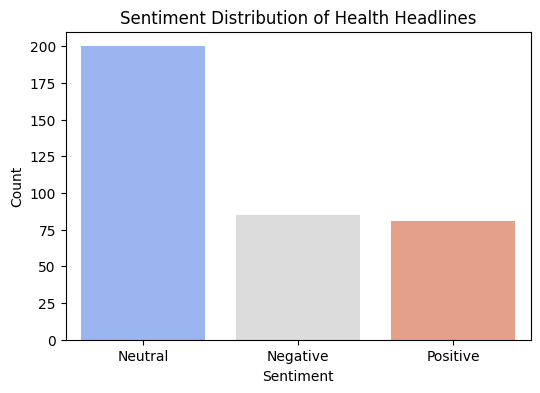

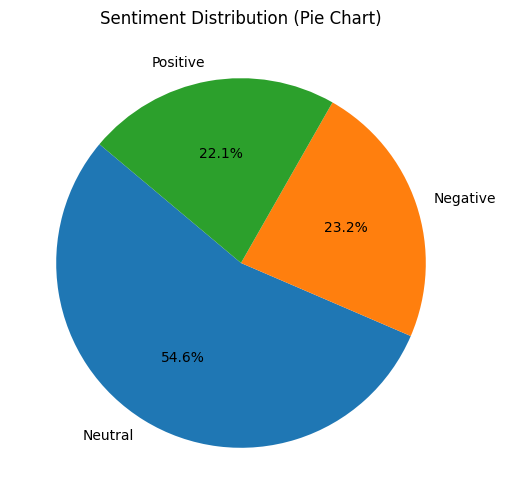

In [11]:
# Count sentiment categories
sentiment_counts = df['Sentiment'].value_counts()

# --- Bar chart ---
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Sentiment Distribution of Health Headlines")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# --- Pie chart ---
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution (Pie Chart)")
plt.show()


In [12]:
# Save to CSV (optional)
df.to_csv("Cleaned_Health_Headlines.csv", index=False)
print("✅ Cleaned dataset with sentiment saved as 'Cleaned_Health_Headlines.csv'")


✅ Cleaned dataset with sentiment saved as 'Cleaned_Health_Headlines.csv'
